In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from roll_mid1 import make_rolling_footprints

from rubin_sim.scheduler.utils import (
    EuclidOverlapFootprint)

from rubin_sim.scheduler.model_observatory import ModelObservatory
import healpy as hp

In [4]:
nside = 32
mjd_start=60796.0
nslice = 2
rolling_scale = 0.9
insert_const = 2

sky = EuclidOverlapFootprint(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()

wfd_indx = np.where(
    (labels == "lowdust") | (labels == "LMC_SMC") | (labels == "virgo")
)[0]
wfd_footprint = footprints_hp_array["r"] * 0
wfd_footprint[wfd_indx] = 1

footprints_hp = {}
for key in footprints_hp_array.dtype.names:
    footprints_hp[key] = footprints_hp_array[key]

footprint_mask = footprints_hp["r"] * 0
footprint_mask[np.where(footprints_hp["r"] > 0)] = 1

repeat_night_weight = None

observatory = ModelObservatory(nside=nside, mjd_start=mjd_start)
conditions = observatory.return_conditions()

footprints = make_rolling_footprints(
    fp_hp=footprints_hp,
    mjd_start=conditions.mjd_start,
    sun_ra_start=conditions.sun_ra_start,
    nslice=nslice,
    scale=rolling_scale,
    nside=nside,
    wfd_indx=wfd_indx,
    order_roll=1,
    n_cycles=3,
    insert_const=insert_const
)


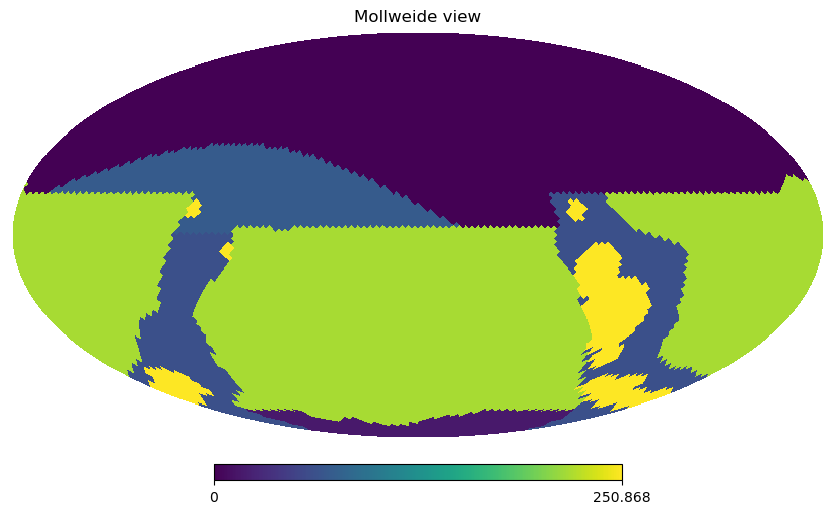

In [5]:
hp.mollview(footprints.estimate_counts(mjd_start+365.25*10)['r'])